In [1]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [20]:
folder = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\Free diffusion control with FUS\Analysed data\reformatted"
os.chdir(folder)
fname = "SPT_results_AIO_concat-Free_diffusion_control_FUS.csv"
df_AIO = pd.read_csv(fname)

# Displacement threshold for immobile molecules
immobile_stepsize_threshold_nm = 50
# alpha component threshold for constrained diffusion
threshold_alpha = 0.9
thereshold_loglog_fit_R2 = 0.9

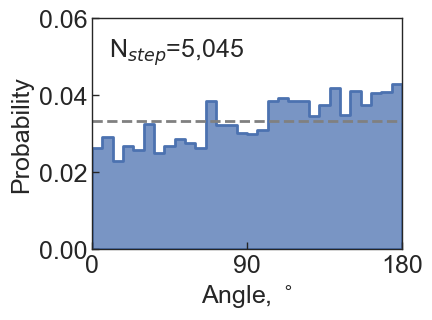

In [23]:
lst_angle = []
# lst_label = []
for _, row in df_AIO[(df_AIO["mean_stepsize_nm"] > immobile_stepsize_threshold_nm) & (df_AIO["alpha"] >= 1.05) & (df_AIO["loglog_fit_R2"] > thereshold_loglog_fit_R2)].iterrows():
    angles = np.fromstring(
        row["list_of_angles"][1:-1],
        dtype=float,
        sep=", ",
    )
    # labels = np.repeat(row["label"], angles.shape[0])
    lst_angle.extend(angles)
    # lst_label.extend(labels)

data = pd.DataFrame(
    {
        "angle": np.abs(lst_angle),
        # "label": lst_label,
    },
    dtype=object,
)


plt.figure(figsize=(4, 3))
bins = 30
sns.histplot(
    data=data,
    x="angle",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 180),
    lw=2,
    element="step",
    legend=False,
)
plt.axhline(1 / 30, ls="--", c="gray", lw=2)
plt.text(
    10,
    0.05,
    r"N$_{step}$=" + f"{data.shape[0]:,}",
    fontdict={"fontsize":18},
)
plt.xlim(0, 180)
plt.xticks([0, 90, 180])
plt.ylim(0, 0.06)
plt.yticks([0, 0.02, 0.04, 0.06])
plt.xlabel("Angle, $^\circ$", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("angle_histo.png", format="png", bbox_inches="tight", dpi=300)